In [1]:
# Importing modules
import pandas as pd
import os
# Read data into papers
data1 = pd.read_csv('../data/train1_full.csv')
data2 = pd.read_csv('../data/valid1_full.csv')
data = pd.concat([data1, data2], axis=0)
print(len(data))
# Print head
data.head()

/var/folders/52/5ygfc9d94sscvjzdx8yvt2sm0000gq/T/ipykernel_28268/4200421487.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('../data/train1_full.csv')
/var/folders/52/5ygfc9d94sscvjzdx8yvt2sm0000gq/T/ipykernel_28268/4200421487.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('../data/valid1_full.csv')


4320858


Unnamed: 0                      item_title item_author_cate article_author   
0           0              平安银行2019年度10派2.18元     股友L0L2595133              0  \
1           1        平安银行：2020上半年净利润同比下降11.2%            一句话财报              0   
2           2  平安银行：主力净流入1.05亿元，两市排名第17（09-16             股市胖虎              0   
3           3  平安银行：主力资金连续4天净流入累计4.11亿元（09-17             股市胖虎              0   
4           4  平安银行：主力净流入3.09亿元，两市排名第14（09-18             股市胖虎              0   

  article_source_cate  year  month  eastmoney_robo_journalism   
0                   0  2020      5                          0  \
1                   0  2020      8                          0   
2                东方财富  2020      9                          0   
3                东方财富  2020      9                          0   
4                东方财富  2020      9                          0   

   media_robo_journalism  SMA_robo_journalism  ...  topics_val8  viral   
0                      0                    1  ...     0.153002      0  \
1                      0                    1  ...     0.147885      0   
2                      0                    1  ...     0.128248      0   
3                      0                    1  ...     0.000000      0   
4                      0                    1  ...     0.127307      0   

   item_author_index  article_author_index  article_source_index   
0                  0                     0                     0  \
1                  1                     0                     0   
2                  2                     0                     1   
3                  2                     0                     1   
4                  2                     0                     1   

   stock_code_index  year_month  item_author_index_rank   
0                 0  2020-05-01                     3.0  \
1                 0  2020-08-01                     2.0   
2                 0  2020-09-01                     1.0   
3                 0  2020-09-01                     1.0   
4                 0  2020-09-01                     1.0   

   article_author_index_rank  article_source_index_rank  
0                        1.0                        1.0  
1                        1.0                        1.0  
2                        4.0                        1.0  
3                        4.0                        1.0  
4                        4.0                        1.0  

[5 rows x 30 columns]

In [2]:
import jieba
from gensim import corpora, models
import re

# 去除文本中的标点符号
def remove_punctuation(text):
    # 使用正则表达式去除标点
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r' ', '', text)
    return text

# 加载停用词列表
stop_words = set()
with open('./hit_stopwords.txt', 'r', encoding='utf-8') as file:  # 假设停用词列表文件名为 chinese_stop_words.txt
    for word in file:
        stop_words.add(word.strip())
def remove_stopwords(words):
    words = [word for word in words if word not in stop_words]
    return words

# eastmoney['sentiment_score'] 为情感得分列
# 分词处理
data['cut_titles'] = data['item_title'].apply(lambda x: remove_stopwords(list(jieba.cut(remove_punctuation(x)))))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/52/5ygfc9d94sscvjzdx8yvt2sm0000gq/T/jieba.cache
Loading model cost 0.573 seconds.
Prefix dict has been built successfully.


In [3]:
data['cut_titles'].head()

0                        [平安, 银行, 年度, 派元]
1              [平安, 银行, 上半年, 净利润, 同比, 下降]
2          [平安, 银行, 主力, 净流入, 亿元, 两市, 排名第]
3    [平安, 银行, 主力, 资金, 连续, 天, 净流入, 累计, 亿元]
4          [平安, 银行, 主力, 净流入, 亿元, 两市, 排名第]
Name: cut_titles, dtype: object

In [4]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data['cut_titles'])
# Create Corpus
texts = data['cut_titles']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [5]:
from pprint import pprint
import gensim.models
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.099*"快速" + 0.044*"上涨" + 0.034*"股份" + 0.034*"反弹" + 0.024*"回调" + 0.023*"年度" '
  '+ 0.017*"ST" + 0.014*"新" + 0.014*"科技" + 0.013*"下跌"'),
 (1,
  '0.053*"交易" + 0.050*"万元" + 0.038*"大宗" + 0.034*"成交" + 0.025*"资金" + 0.023*"相关" '
  '+ 0.019*"主力" + 0.016*"折价" + 0.013*"股份" + 0.013*"接受"'),
 (2,
  '0.164*"融资" + 0.094*"万元" + 0.079*"余额" + 0.060*"万股" + 0.060*"亿元" + 0.056*"股通" '
  '+ 0.040*"偿还" + 0.040*"买入" + 0.034*"减持" + 0.032*"沪"'),
 (3,
  '0.036*"公司" + 0.022*"盘中" + 0.018*"股份" + 0.017*"净利润" + 0.014*"证券" + '
  '0.013*"亿元" + 0.012*"同比" + 0.010*"跌幅" + 0.010*"科技" + 0.010*"评级"'),
 (4,
  '0.089*"万元" + 0.065*"连续" + 0.063*"累计" + 0.061*"融资" + 0.039*"偿还" + 0.031*"涨幅" '
  '+ 0.031*"股东" + 0.030*"买入" + 0.017*"股份" + 0.016*"持股"')]


In [6]:
from tqdm import tqdm
# 如果需要将主题分布加入原DataFrame
data['topics'] = [lda_model[id2word.doc2bow(text)] for text in tqdm(data['cut_titles'], desc="Calculating topics")]

Calculating topics:   0%|          | 0/4320858 [00:00<?, ?it/s]

Calculating topics: 100%|██████████| 4320858/4320858 [07:58<00:00, 9027.30it/s] 


In [7]:
# 为每个文档提取最大概率的主题，并加入DataFrame
dominant_topics = []
for topic_tuple in tqdm(data['topics'], desc="Extracting dominant topics"):
    if topic_tuple:  # 确保topics元组不为空
        topic_list = topic_tuple  # 获取主题概率列表
        if topic_list:  # 确保主题列表不为空
            dominant_topic = max(topic_list, key=lambda x: x[1])[0]
            dominant_topics.append(dominant_topic)
        else:
            dominant_topics.append(None)  # 如果没有主题，则添加None
    else:
        dominant_topics.append(None)  # 如果topics元组为空，添加None

data['dominant_topic'] = dominant_topics

Extracting dominant topics: 100%|██████████| 4320858/4320858 [00:04<00:00, 904815.95it/s]


In [8]:
path = './eastmoney_topic.csv'
data = data[['item_title','topics','dominant_topic', 'year','month']]
print(data.head())
data.to_csv(path, index=False)
doc_lda.save('./lda_model.gensim')

                       item_title   
0              平安银行2019年度10派2.18元  \
1        平安银行：2020上半年净利润同比下降11.2%   
2  平安银行：主力净流入1.05亿元，两市排名第17（09-16   
3  平安银行：主力资金连续4天净流入累计4.11亿元（09-17   
4  平安银行：主力净流入3.09亿元，两市排名第14（09-18   

                                              topics  dominant_topic  year   
0  [(0, 0.4513538), (1, 0.42719546), (2, 0.040402...               0  2020  \
1  [(0, 0.028599624), (1, 0.029249543), (2, 0.028...               3  2020   
2  [(0, 0.025011698), (1, 0.49090013), (2, 0.4337...               1  2020   
3  [(0, 0.020005248), (1, 0.72062945), (2, 0.0207...               1  2020   
4  [(0, 0.025011696), (1, 0.49087447), (2, 0.4338...               1  2020   

   month  
0      5  
1      8  
2      9  
3      9  
4      9  


/Users/wuziqing/.local/share/virtualenvs/MTL_project-BiIXOKA8/lib/python3.9/site-packages/gensim/interfaces.py:92: UserWarning: corpus.save() stores only the (tiny) iteration object in memory; to serialize the actual corpus content, use e.g. MmCorpus.serialize(corpus)
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

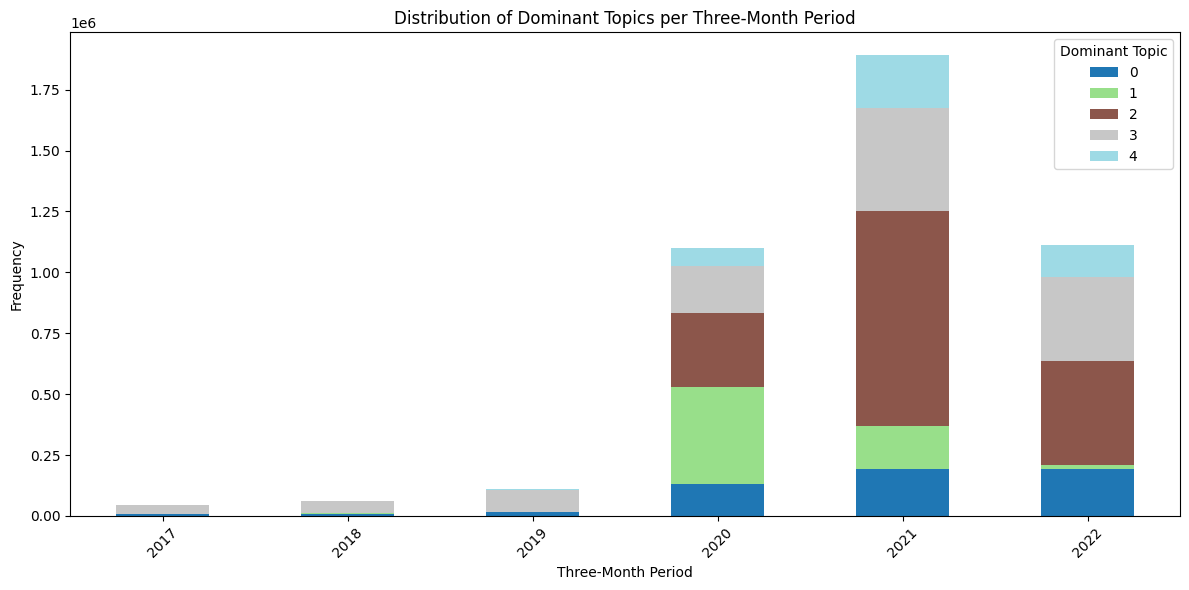

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Combine 'year' and 'month' into a datetime column
data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str))

# Step 2: Create a "three-month period" column
data['period'] = data['date'].dt.to_period("Y")

# Step 3: Group by 'period' and 'dominant_topic', and count occurrences
topic_distribution = data.groupby(['period', 'dominant_topic']).size().unstack(fill_value=0)

# Step 4: Plot the distribution of dominant topics across three-month periods
plt.figure(figsize=(12, 6))
topic_distribution.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 6))

plt.title('Distribution of Dominant Topics per Three-Month Period')
plt.xlabel('Three-Month Period')
plt.ylabel('Frequency')
plt.legend(title='Dominant Topic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Train Topic Classification Model

In [11]:
# only run if not continued from previous block
import pandas as pd
data = pd.read_csv('./eastmoney_topic.csv')
data.head()


In [26]:
import torch
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

In [27]:
from transformers import BertTokenizer, BertModel
import torch
tokenizer = BertTokenizer.from_pretrained("Langboat/mengzi-bert-base-fin")
model = BertModel.from_pretrained("Langboat/mengzi-bert-base-fin").to(device)

In [48]:
def get_bert_embedding(titles, model, device, batch_size=16):
    embeddings = []
    for i in tqdm(range(0, len(titles), batch_size)):
        batch_titles = titles[i:i+batch_size]
        inputs = tokenizer(batch_titles.tolist(), return_tensors='pt', padding=True, truncation=True, max_length=32)
        inputs = {key:val.to(device) for key, val in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1)

        embeddings.extend(batch_embeddings.cpu().numpy())
    return embeddings

In [ ]:
data['title_embed'] = get_bert_embedding(data['item_title'], model, device, batch_size=64)

  2%|▏         | 1171/67514 [06:09<5:51:12,  3.15it/s]

In [30]:
data['title_embed'] = get_bert_embedding(data['item_title'], model, device)]print(data.head())

  0%|          | 0/270054 [00:00<?, ?it/s]

100%|██████████| 270054/270054 [13:18<00:00, 338.20it/s]


ValueError: Length of values (10) does not match length of index (4320858)

In [ ]:
data.to_csv('./eastmoney_topic.csv', index=False)

In [223]:
class LDADataset(torch.utils.data.Dataset):
    def __init__(self, dataset, device):
        self.data = dataset
        self.device = device
        
    # get sample
    def __getitem__(self, idx):
        batch = self.data.iloc[idx,:]

        input = batch['title_embed']
        target = batch['dominant_topic']

        input = torch.tensor(input).to(self.device)
        target = torch.tensor(target).to(self.device)
        print(input.shape)
        print(target.shape)

        return input , target

    def __len__(self):
        return len(self.data)

In [224]:
from torch.utils.data import DataLoader

# Create a 'year_month' column by combining 'year' and 'month'
data['year_month'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str) + '-01')

# Define the date ranges for train, valid, and test sets
train_start = '2017-01-01'
train_end = '2022-03-31'
test_start = '2022-04-01'
test_end = '2022-06-30'

# Split the data based on the defined ranges
train_set = data[(data['year_month'] >= train_start) & (data['year_month'] <= train_end)]
test_set = data[(data['year_month'] >= test_start) & (data['year_month'] <= test_end)]
train_len, test_len = len(train_set), len(test_set)
print(train_len, test_len)

train_data = LDADataset(train_set, device)
test_data = LDADataset(test_set, device)

3772284 548574


In [215]:
# classifier hyper parameters 
bs = 32
lr = 0.001
input_size = 768  # Number of features
hidden_size = 128  # Hidden layer size
output_size = 5

In [225]:
train_loader = DataLoader(train_data, batch_size=bs, shuffle=True)
test_loader = DataLoader(test_data, batch_size=bs, shuffle=True)

In [226]:
import torch.nn as nn
import torch.nn.functional as F
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPClassifier, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(0.5)  # Dropout layer for regularization

    def forward(self, x):
        # Define the forward pass
        x = F.relu(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [227]:
classifier = MLPClassifier(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Use CrossEntropy for classification
optimizer = torch.optim.Adam(classifier.parameters(), lr=lr)

In [228]:
# Training function
def train(model, train_loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in tqdm(train_loader):
            optimizer.zero_grad()  # Zero out the gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backpropagate
            optimizer.step()  # Update the weights

            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

In [ ]:
# Train the model
train(classifier, train_loader, criterion, optimizer, epochs=20)

tensor([[ 101,  704, 3341,  ...,    0,    0,    0],
        [ 101, 6815, 1046,  ...,    0,    0,    0],
        [ 101, 3449, 5709,  ...,    0,    0,    0],
        ...,
        [ 101, 4854, 6825,  ...,    0,    0,    0],
        [ 101,  115, 8811,  ...,    0,    0,    0],
        [ 101, 3173, 1290,  ...,    0,    0,    0]]) torch.Size([32, 64])
tensor([[ 101, 3736, 5722,  ...,    0,    0,    0],
        [ 101,  928, 2622,  ...,    0,    0,    0],
        [ 101, 1744, 1039,  ...,    0,    0,    0],
        ...,
        [ 101, 3939, 2458,  ...,    0,    0,    0],
        [ 101, 3926, 3980,  ...,    0,    0,    0],
        [ 101, 3828, 3209,  ...,    0,    0,    0]]) torch.Size([32, 64])
tensor([[ 101, 4886, 2128,  ...,    0,    0,    0],
        [ 101, 1744, 7354,  ...,    0,    0,    0],
        [ 101, 3851, 2168,  ...,    0,    0,    0],
        ...,
        [ 101, 7320,  691,  ...,    0,    0,    0],
        [ 101, 4403, 3736,  ...,    0,    0,    0],
        [ 101, 3419, 2209,  ..., 

In [ ]:
# Evaluation function
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient computation for inference
        for inputs, labels in tqdm(test_loader):
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')

In [ ]:
evaluate(classifier, test_loader)